In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from functions.functions import *

In [6]:
df = pd.read_csv('../data/source/df_joined.csv')
df['default'] = df['default'].astype('int')
df['obs_date'] = pd.to_datetime(df['obs_date'])
df['year'] = df['obs_date'].dt.year

In [7]:
df

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,default,year
0,6311599,2020-12-31,1.222503e+05,1.319265e+05,8.437827e+04,4.452988,-0.573123,5.392172e+03,0.146342,4.465833e+04,...,-8.437827e+04,-1.196308,1.044730e+05,0.208097,-8.437827e+04,-1.685863,NaN,9.479673e+04,0,2020
1,25934835,2015-12-31,3.889795e+05,4.281552e+05,5.713941e+04,1.517365,0.894176,1.031739e+04,0.056952,6.508156e+04,...,7.471376e+04,0.622329,3.928746e+04,0.877436,7.471376e+04,0.990912,1.187002e+05,1.326275e+05,0,2015
2,70390679,2019-12-31,1.489137e+09,1.520700e+09,NaN,1.112577,0.303833,2.193759e+07,0.008544,1.155258e+08,...,8.929345e+07,0.355066,1.606428e+08,0.894363,8.929345e+07,0.649580,5.724240e+08,1.506798e+08,0,2019
3,70390679,2020-12-31,1.523974e+09,1.549976e+09,2.863042e+06,1.162289,0.088073,2.196899e+07,0.014428,1.877299e+08,...,2.544141e+07,0.092185,2.194908e+08,0.858391,2.544141e+07,0.121324,1.172183e+09,2.127906e+08,0,2020
4,70390679,2016-12-31,1.795857e+09,1.796012e+09,NaN,1.323929,0.086474,NaN,0.014659,2.086998e+08,...,5.854743e+07,0.180772,4.362834e+08,0.757082,5.854743e+07,0.280534,5.106536e+08,4.393970e+08,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148924,18704864,2020-12-31,1.569996e+09,1.570014e+09,1.842830e+08,1.457124,-0.128417,1.306725e+05,0.009390,1.336044e+08,...,-1.015468e+08,-0.472967,4.925521e+08,0.686275,-1.015468e+08,-0.759314,9.371602e+08,4.925339e+08,0,2020
148925,18704864,2019-12-31,2.031003e+09,2.031129e+09,9.294428e+07,1.173625,0.152625,2.003555e+05,0.007202,1.252715e+08,...,8.459409e+07,0.365641,3.005910e+08,0.852008,8.459409e+07,0.674208,1.493421e+09,3.004651e+08,1,2019
148926,13920314,2017-12-31,4.975412e+05,5.677995e+05,1.533735e+05,1.490486,-0.340115,7.535736e+03,0.042170,1.002575e+05,...,-1.533735e+05,-0.738292,2.339882e+05,0.587904,-1.533735e+05,-1.422849,1.521323e+05,1.637299e+05,0,2017
148927,13920314,2016-12-31,7.674287e+05,7.879210e+05,2.727946e+05,1.270313,-1.587593,4.596592e+03,0.072011,2.153525e+05,...,-2.727946e+05,-0.679821,9.418410e+04,0.880465,-2.727946e+05,-1.240262,3.115334e+05,1.633029e+05,0,2016


In [4]:
# do we need this? can we delete it?
df_slice = df[df['ID']==1574]
df_slice2 = df[df['ID']==9353]

In [9]:
df_1 = filter_df(df)
# df_1 = df_1[['ID', 'obs_date', 'cutoff_date', 'default', 'new_default']]

/Users/kacpergruca/Documents/Studia/UW/4_semestr/Understanding Business/UB_ING_Case/scripts/functions/functions.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_default_indices['filter_condition'] = True


In [10]:
df_1

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,default,year
15,6689,2015-12-31,1.767218e+09,1.948689e+10,2.329044e+08,0.734947,0.542522,1.714682e+09,0.384813,7.392133e+08,...,8.425048e+09,2.074382,8.021040e+09,0.518512,8.425048e+09,3.433336,5.710332e+08,-6.373332e+08,0,2015
16,6689,2016-12-31,3.232833e+09,2.160626e+10,1.899846e+09,1.105073,0.523663,1.638684e+09,0.372563,1.021945e+09,...,8.252083e+09,1.937487,8.448764e+09,0.544391,8.252083e+09,3.101552,5.956984e+08,3.073853e+08,1,2016
22,9353,2015-03-31,2.586283e+09,1.063976e+10,4.099697e+07,0.814620,0.547254,1.038821e+09,0.352002,2.454954e+09,...,3.011540e+09,0.598954,2.348640e+09,0.640609,3.011540e+09,0.861973,9.297278e+08,-5.885497e+08,0,2015
23,9353,2016-03-31,3.068856e+09,1.282924e+10,4.147103e+07,0.744966,0.785927,1.297698e+09,0.354587,3.170806e+09,...,3.897413e+09,0.753560,2.729312e+09,0.666038,3.897413e+09,0.872196,1.389280e+09,-1.050599e+09,1,2016
26,9459,2015-12-31,3.104298e+09,4.894807e+09,6.749521e+08,1.147094,-0.310680,1.532888e+08,0.062220,6.821751e+08,...,-6.605060e+08,-0.634492,1.012027e+09,0.651418,-6.605060e+08,-0.790586,1.162908e+09,3.980693e+08,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128338,99991694,2015-12-31,6.192680e+05,2.533073e+06,1.471271e+05,1.708610,-0.026182,9.833619e+03,0.064670,1.122458e+05,...,-1.000410e+05,-0.465534,2.761724e+05,0.143083,-1.000410e+05,-0.819475,1.655752e+05,2.568284e+05,0,2015
24213,99991954,2018-12-31,4.354878e+07,5.113584e+07,8.003650e+05,2.846886,-2.546194,4.679316e+05,-6.612175,-1.673950e+07,...,5.351337e+07,-2.767837,-1.768798e+07,1.345902,5.351337e+07,-3.288766,3.360523e+06,2.825179e+07,0,2018
24215,99991954,2019-12-31,1.798610e+07,2.201727e+07,8.853989e+03,0.397986,-0.526652,1.008313e+06,-0.629559,-1.082530e+07,...,2.343495e+07,-1.243299,-2.317558e+07,2.052609,2.343495e+07,-2.387182,3.530658e+06,-2.720675e+07,0,2019
24214,99991954,2020-12-31,1.267978e+07,1.571147e+07,1.110184e+05,0.266830,-0.524300,1.040206e+06,-0.320276,-7.251975e+06,...,3.169654e+07,-2.684783,-3.180862e+07,3.024547,3.169654e+07,-5.102660,5.735074e+04,-3.484031e+07,0,2020


## Check default ratio in every year

In [12]:
df_1.groupby('year')['default'].mean()

year
2015    0.155059
2016    0.067632
2017    0.050681
2018    0.043920
2019    0.044501
2020    0.040701
2021    0.048115
Name: default, dtype: float64

In [16]:
var_columns = [f'Var_{i:02d}' for i in range(1, 40)]

In [17]:
df_1 = preprocess_data(df_1)

In [18]:
df_1

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,default,year
15,6689,2015-12-31,1.767218e+09,1.948689e+10,2.329044e+08,0.734947,0.542522,1.714682e+09,0.384813,7.392133e+08,...,8.425048e+09,2.074382,8.021040e+09,0.518512,8.425048e+09,3.433336,5.710332e+08,-6.373332e+08,0,2015
16,6689,2016-12-31,3.232833e+09,2.160626e+10,1.899846e+09,1.105073,0.523663,1.638684e+09,0.372563,1.021945e+09,...,8.252083e+09,1.937487,8.448764e+09,0.544391,8.252083e+09,3.101552,5.956984e+08,3.073853e+08,1,2016
22,9353,2015-03-31,2.586283e+09,1.063976e+10,4.099697e+07,0.814620,0.547254,1.038821e+09,0.352002,2.454954e+09,...,3.011540e+09,0.598954,2.348640e+09,0.640609,3.011540e+09,0.861973,9.297278e+08,-5.885497e+08,0,2015
23,9353,2016-03-31,3.068856e+09,1.282924e+10,4.147103e+07,0.744966,0.785927,1.297698e+09,0.354587,3.170806e+09,...,3.897413e+09,0.753560,2.729312e+09,0.666038,3.897413e+09,0.872196,1.389280e+09,-1.050599e+09,1,2016
26,9459,2015-12-31,3.104298e+09,4.894807e+09,6.749521e+08,1.147094,-0.310680,1.532888e+08,0.062220,6.821751e+08,...,-6.605060e+08,-0.634492,1.012027e+09,0.651418,-6.605060e+08,-0.790586,1.162908e+09,3.980693e+08,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128338,99991694,2015-12-31,6.192680e+05,2.533073e+06,1.471271e+05,1.708610,-0.026182,9.833619e+03,0.064670,1.122458e+05,...,-1.000410e+05,-0.465534,2.761724e+05,0.143083,-1.000410e+05,-0.819475,1.655752e+05,2.568284e+05,0,2015
24213,99991954,2018-12-31,4.354878e+07,5.113584e+07,8.003650e+05,2.846886,-2.546194,4.679316e+05,0.000000,0.000000e+00,...,5.351337e+07,-2.767837,0.000000e+00,1.345902,5.351337e+07,-3.288766,3.360523e+06,2.825179e+07,0,2018
24215,99991954,2019-12-31,1.798610e+07,2.201727e+07,8.853989e+03,0.397986,-0.526652,1.008313e+06,0.000000,0.000000e+00,...,2.343495e+07,-1.243299,0.000000e+00,2.052609,2.343495e+07,-2.387182,3.530658e+06,-2.720675e+07,0,2019
24214,99991954,2020-12-31,1.267978e+07,1.571147e+07,1.110184e+05,0.266830,-0.524300,1.040206e+06,0.000000,0.000000e+00,...,3.169654e+07,-2.684783,0.000000e+00,3.024547,3.169654e+07,-5.102660,5.735074e+04,-3.484031e+07,0,2020


## Fill missing values with KNN imputer

In [20]:
imputer = KNNImputer(n_neighbors=5)

In [17]:
df_imputed = pd.DataFrame(imputer.fit_transform(df_1[var_columns]), columns=var_columns)

In [18]:
default_column = df_1['default'].reset_index(drop=True)

# Assign the reset index column to df_imputed
df_imputed['default'] = default_column

## Weight of evidence

In [19]:
df_binned = binning_with_decision_tree(df_imputed)

In [52]:
df_woe = calculate_woe(df_binned, target='default')

In [53]:
df_woe

,Var_01_woe,Var_02_woe,Var_03_woe,Var_04_woe,Var_05_woe,Var_06_woe,Var_07_woe,Var_08_woe,Var_09_woe,Var_10_woe,...,Var_31_woe,Var_32_woe,Var_33_woe,Var_34_woe,Var_35_woe,Var_36_woe,Var_37_woe,Var_38_woe,Var_39_woe,default
0,1.602029,2.161178,1.601304,-0.242243,0.050486,2.558108,-0.096086,1.927932,2.507456,3.059200,...,0.663223,1.725419,-0.000282,3.066939,0.119413,1.722072,-0.090043,1.529446,0.435364,0
1,1.989977,2.161178,2.382690,-0.242243,0.050486,2.558108,-0.096086,2.747950,2.507456,3.059200,...,0.663223,1.725419,-0.000282,3.066939,0.119413,1.722072,-0.090043,1.529446,2.381269,1
2,1.989977,2.161178,1.172870,-0.242243,0.050486,2.558108,-0.096086,2.747950,2.507456,2.288942,...,0.178431,1.725419,-0.247608,2.305629,-0.065835,1.722072,-0.090043,1.822981,0.435364,0
3,1.989977,2.161178,1.172870,-0.242243,-0.128911,2.558108,-0.096086,2.747950,2.507456,2.288942,...,0.178431,1.725419,-0.000282,2.305629,-0.065835,1.722072,-0.090043,1.822981,0.435364,1
4,1.989977,1.785738,2.382690,-0.242243,-0.467310,1.559653,-0.096086,1.927932,1.907468,1.900164,...,-0.787109,2.743854,-0.247608,1.906589,-0.065835,2.906220,-0.311843,1.822981,2.381269,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125753,1.602029,1.508321,1.601304,-0.242243,0.044977,-2.377479,-0.096086,1.927932,1.907468,1.900164,...,-0.787109,1.849329,-0.247608,1.906589,-0.065835,1.859636,-0.311843,1.822981,2.381269,0
125754,1.602029,1.508321,1.601304,-0.242243,0.218554,-0.704081,-0.096086,1.213114,1.293746,1.567715,...,-0.787109,1.053915,-0.247608,1.573936,-0.231364,1.053113,-0.090043,1.822981,1.788023,0
125755,-2.744596,-8.788252,-2.027166,0.001806,-0.467310,-2.377479,-0.096086,-2.905559,-3.122933,-3.475616,...,-0.787109,-2.063711,-0.247608,-3.409683,-0.065835,-2.072218,0.091239,-2.049761,-2.721174,0
125756,-2.744596,-8.788252,-2.027166,-0.242243,-0.467310,-2.377479,-0.096086,-2.905559,-3.122933,-3.475616,...,-0.787109,-2.063711,-0.247608,-3.409683,-0.231364,-2.072218,-0.311843,-2.049761,-2.721174,0


In [56]:
# df_woe.to_csv('../data/processed/df_woe.csv', index=False)

In [22]:
# df_woe = pd.read_csv('../data/processed/df_woe.csv')

## Population stability index (PSI)

In [27]:
# Preparation for PSI calculation in order to check the colinearity. 
df_woe_time = df_woe
df_woe_time['year'] = df_1['year'].reset_index(drop=True)

In [28]:
psi_results = calculate_psi(df_woe_time, time_column='year')

In [29]:
psi_results.head(5)

,PSI
Var_01_woe,0.036774
Var_02_woe,0.035857
Var_03_woe,0.029598
Var_04_woe,0.007033
Var_05_woe,0.003115


## Check colinearity

In [69]:
df_VIF_woe = check_collinearity(df_woe)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: 

In [31]:
param_grid = {
        'penalty': ['l1', 'l2'],  # Regularization penalty
        'C': [0.001, 0.01, 0.1, 1],  # Inverse of regularization strength
        'solver': ['liblinear', 'saga'],  # Algorithm to use in the optimization problem
        'max_iter': [100, 500, 1000],  # Maximum number of iterations
        'class_weight': [None, 'balanced']  # Weights associated with classes
    }

model = LogisticRegression(random_state = 42)

In [32]:
# columns to drop after VIW calculation
cols_to_drop = ['Var_02_woe', 'Var_01_woe', 'Var_11_woe', 'Var_18_woe', 'Var_29_woe', 'Var_36_woe', 'Var_34_woe', 'Var_22_woe', 'Var_12_woe', 'Var_16_woe', 'Var_19_woe', 'Var_30_woe', 'Var_09_woe', 'Var_21_woe', 'Var_17_woe', 'Var_14_woe', 'Var_26_woe', 'Var_32_woe', 'Var_39_woe', 'Var_24_woe', 'Var_06_woe', 'Var_38_woe', 'Var_10_woe', 'Var_20_woe']
df_VIF_woe = df_woe.drop(cols_to_drop, axis=1)

In [39]:
# df_VIF_woe.to_csv('../data/processed/df_VIF_woe.csv', index=False)

## Estimate Logistic regresison

In [33]:
results_vif_LR = train_and_evaluate_pipeline(df_VIF_woe, time = 2020, model = model, param_grid = param_grid)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.917 total time=   0.1s
[CV 2/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.912 total time=   0.2s
[CV 3/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.916 total time=   0.1s
[CV 4/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.910 total time=   0.2s
[CV 5/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.910 total time=   0.2s
[CV 1/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=saga;, score=0.912 total time=   0.4s
[CV 2/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=saga;, score=0.907 total time=   0.3s
[CV 3/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=saga;, score=0.911 total time=   0.3s
[CV 4/5] END C=0.

/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_1984/975800168.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model_Specs': best_model,
/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_1984/975800168.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model_Specs': model_params,
/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_1984/975800168.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model_Specs': model_params,
/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_1984/975800168.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

In-Time Train Evaluation Results:
Train Gini: 0.8423
Train Confusion Matrix:
[[56008 11515]
 [  618  4860]]

In-Time Test Evaluation Results:
Test Gini: 0.8383
Test Confusion Matrix:
[[23811  5128]
 [  266  2082]]

Out-of-Time Test Evaluation Results:
Test Gini: 0.7915
Test Confusion Matrix:
[[20505    42]
 [  846    77]]


/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_1984/975800168.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model_Specs': model_params,


## Estimate XGB

In [35]:
from xgboost import XGBClassifier

# Define XGBoost model
xgb_model = XGBClassifier(random_state=42)
param_grid_xgboost = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [200],
    #'max_depth': [3, 4, 5],
    'min_child_weight': [2, 3],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7],
    'gamma': [0.1, 0.2],
    'reg_alpha': [0.1, 0.2],
    #'reg_lambda': [0, 0.1, 0.2]
}


In [36]:
results_vif_xgb = train_and_evaluate_pipeline(df_VIF_woe, target='default', time=2020, model=xgb_model, param_grid=param_grid_xgboost)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, min_child_weight=2, n_estimators=200, reg_alpha=0.1, subsample=0.7;, score=0.957 total time=   0.8s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, min_child_weight=2, n_estimators=200, reg_alpha=0.1, subsample=0.7;, score=0.960 total time=   0.7s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, min_child_weight=2, n_estimators=200, reg_alpha=0.1, subsample=0.7;, score=0.959 total time=   0.7s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, min_child_weight=2, n_estimators=200, reg_alpha=0.1, subsample=0.7;, score=0.953 total time=   0.6s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, min_child_weight=2, n_estimators=200, reg_alpha=0.1, subsample=0.7;, score=0.957 total time=   0.7s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, min_child_weight=2, n_estimators=200, reg_alpha=

/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_1984/975800168.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model_Specs': best_model,
/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_1984/975800168.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model_Specs': model_params,
/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_1984/975800168.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model_Specs': model_params,
/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_1984/975800168.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

In-Time Train Evaluation Results:
Train Gini: 0.9469
Train Confusion Matrix:
[[66986   537]
 [ 2135  3343]]

In-Time Test Evaluation Results:
Test Gini: 0.9142
Test Confusion Matrix:
[[28623   316]
 [ 1004  1344]]

Out-of-Time Test Evaluation Results:
Test Gini: 0.8850
Test Confusion Matrix:
[[20388   159]
 [  553   370]]


/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_1984/975800168.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model_Specs': model_params,


In [24]:
results_vif_xgb

NameError: name 'results_vif_xgb' is not defined

In [38]:
results_vif_LR

,Model_Specs,Model_Name,In_Time_Train_Gini,In_Time_Test_Gini,Out_of_Time_Test_Gini,In_Time_Train_Confusion_Matrix,In_Time_Test_Confusion_Matrix,Out_of_Time_Test_Confusion_Matrix
0,"LogisticRegression(C=1, class_weight='balanced...",Lo_1,0.880477,0.876069,0.832646,"[[56008, 11515], [618, 4860]]","[[23811, 5128], [266, 2082]]","[[17345, 3202], [179, 744]]"
1,"{'C': 0.001, 'class_weight': None, 'max_iter':...",Lo_2,0.834341,0.830179,0.785227,None,None,"[[20510, 37], [871, 52]]"
2,"{'C': 0.001, 'class_weight': None, 'max_iter':...",Lo_3,0.872601,0.869718,0.823082,None,None,"[[20475, 72], [759, 164]]"
3,"{'C': 0.001, 'class_weight': None, 'max_iter':...",Lo_4,0.869891,0.866591,0.821787,None,None,"[[20507, 40], [814, 109]]"
4,"{'C': 0.001, 'class_weight': None, 'max_iter':...",Lo_5,0.842314,0.838324,0.791508,None,None,"[[20505, 42], [846, 77]]"


### Write results of LR and XGB

In [47]:
results_vif_LR.to_csv('../data/results/results_vif_LR.csv', index=False)
results_vif_xgb.to_csv('../data/results/results_vif_xgb.csv', index=False)

In [41]:
# select just first row from results_vif_LR as dataframe
one_xgb = results_vif_xgb.iloc[0]
one_xgb = pd.DataFrame(one_xgb).T
one_xgb


,Model_Specs,Model_Name,In_Time_Train_Gini,In_Time_Test_Gini,Out_of_Time_Test_Gini,In_Time_Train_Confusion_Matrix,In_Time_Test_Confusion_Matrix,Out_of_Time_Test_Confusion_Matrix
0,"XGBClassifier(base_score=None, booster=None, c...",XG_1,0.946175,0.91603,0.886228,"[[66986, 537], [2135, 3343]]","[[28623, 316], [1004, 1344]]","[[20395, 152], [552, 371]]"


In [42]:
results_final = pd.concat([results_vif_LR, one_xgb])

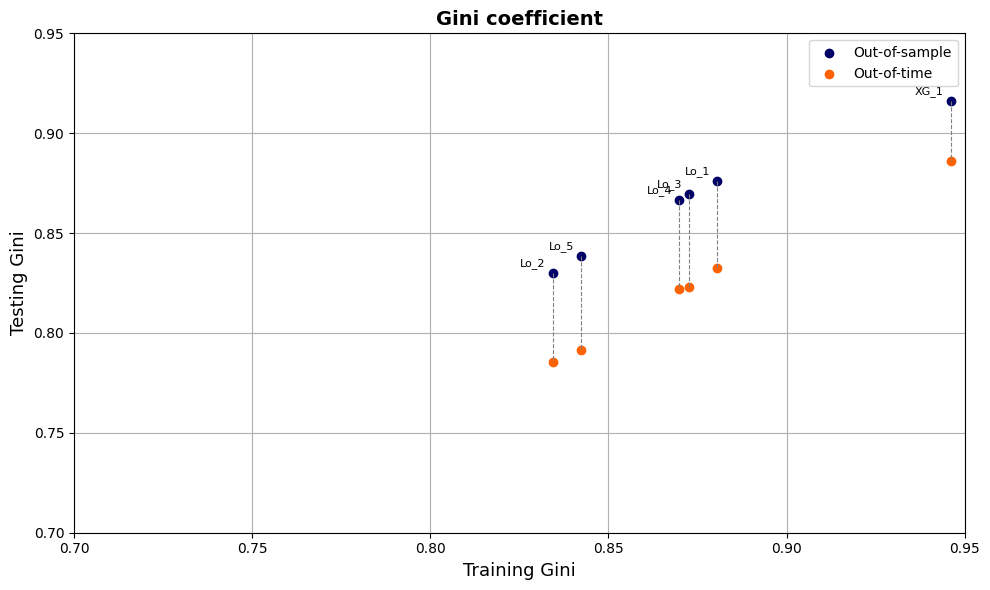

In [43]:
plt.figure(figsize=(10, 6))

# In-time testing Gini
plt.scatter(results_final['In_Time_Train_Gini'], results_final['In_Time_Test_Gini'], color='#000066', label='Out-of-sample')

# Out-of-time testing Gini
plt.scatter(results_final['In_Time_Train_Gini'], results_final['Out_of_Time_Test_Gini'], color='#ff6200', label='Out-of-time')

# Add lollipop lines
for index, row in results_final.iterrows():
    plt.plot([row['In_Time_Train_Gini'], row['In_Time_Train_Gini']], [row['In_Time_Test_Gini'], row['Out_of_Time_Test_Gini']], color='gray', linestyle='--', linewidth=0.8)
    plt.text(row['In_Time_Train_Gini'] - 0.002, row['In_Time_Test_Gini'] + 0.002, row['Model_Name'], ha='right', va='bottom', fontsize=8)

# Add labels and legend
plt.xlabel('Training Gini', fontsize=13)
plt.ylabel('Testing Gini', fontsize=13)
plt.title('Gini coefficient', fontsize=14, fontweight='bold')
plt.legend()

# Set limits for x and y axes
plt.xlim(0.7, 0.95)
plt.ylim(0.7, 0.95)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Shapley value

In [2]:
df_VIF_woe = pd.read_csv('../data/processed/df_VIF_woe.csv')
results_vif_LR = pd.read_csv('../data/results/results_vif_LR.csv')
results_vif_xgb = pd.read_csv('../data/results/results_vif_xgb.csv')

In [3]:
var_dict = {'Var_03_woe': 'Cash And Cash Equivalents', 
            'Var_08_woe': 'Earnings Before Interest And Tax', 
            'Var_25_woe': 'Quick Ratio', 
            'Var_04_woe': 'Current Ratio',
            'Var_31_woe': 'Sales / Total Assets', 
            'Var_15_woe': 'Gross Profit Margin', 
            'Var_05_woe': 'Debt / Net Worth', 
            'Var_28_woe': 'Return On Total Equity Reserve',
            'Var_27_woe': 'Return On Assets', 
            'Var_37_woe': 'Total Net Debt EBITDA', 
            'Var_13_woe': 'Financial Leverage', 
            'Var_35_woe': 'Total Liabilities / Total Assets',
            'Var_33_woe': 'Senior Net Debt', 
            'Var_23_woe': 'Net Profit Margin', 
            'Var_07_woe': 'EBITDA Margin'
            }

# change colnames in df_VIF_woe according to var_dict
df_VIF_woe.rename(columns=var_dict, inplace=True)

In [4]:
df_VIF_woe

,Cash And Cash Equivalents,Current Ratio,Debt / Net Worth,EBITDA Margin,Earnings Before Interest And Tax,Financial Leverage,Gross Profit Margin,Net Profit Margin,Quick Ratio,Return On Assets,Return On Total Equity Reserve,Sales / Total Assets,Senior Net Debt,Total Liabilities / Total Assets,Total Net Debt EBITDA,default,year
0,1.601304,-0.242243,0.050486,-0.096086,1.927932,0.123224,0.054943,0.971286,-0.572399,0.366856,0.442086,0.663223,-0.000282,0.119413,-0.090043,0,2015
1,2.382690,-0.242243,0.050486,-0.096086,2.747950,0.123224,0.054943,-0.120325,-0.144539,0.366856,0.442086,0.663223,-0.000282,0.119413,-0.090043,1,2016
2,1.172870,-0.242243,0.050486,-0.096086,2.747950,-0.063886,-0.228062,-0.120325,-0.572399,-0.516452,-0.604011,0.178431,-0.247608,-0.065835,-0.090043,0,2015
3,1.172870,-0.242243,-0.128911,-0.096086,2.747950,-0.063886,-0.228062,-0.120325,-0.572399,-0.516452,-0.976500,0.178431,-0.000282,-0.065835,-0.090043,1,2016
4,2.382690,-0.242243,-0.467310,-0.096086,1.927932,-0.063886,0.088974,-0.120325,-0.144539,-0.212252,-0.290762,-0.787109,-0.247608,-0.065835,-0.311843,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125753,1.601304,-0.242243,0.044977,-0.096086,1.927932,-0.063886,0.396170,-0.120325,0.117773,-0.004348,-0.290762,-0.787109,-0.247608,-0.065835,-0.311843,0,2020
125754,1.601304,-0.242243,0.218554,-0.096086,1.213114,-0.227442,0.396170,0.140213,-0.144539,0.366856,0.442086,-0.787109,-0.247608,-0.231364,-0.090043,0,2021
125755,-2.027166,0.001806,-0.467310,-0.096086,-2.905559,-0.063886,0.396170,-0.120325,-0.144539,-0.212252,-0.604011,-0.787109,-0.247608,-0.065835,0.091239,0,2017
125756,-2.027166,-0.242243,-0.467310,-0.096086,-2.905559,-0.227442,0.396170,-0.120325,-0.144539,-0.004348,-0.976500,-0.787109,-0.247608,-0.231364,-0.311843,0,2016


## Delete observations after first iteration

In [5]:
cols_to_drop = ['Net Profit Margin', 'Return On Total Equity Reserve']
df_VIF_woe_dropped = df_VIF_woe.drop(cols_to_drop, axis=1)

In [15]:
# df_VIF_woe_dropped.to_csv('../data/processed/df_VIF_woe_dropped.csv', index=False)

In [9]:
df_VIF_woe_dropped = pd.read_csv('../data/processed/df_VIF_woe_dropped.csv')

In [16]:
model_config = results_vif_LR.iloc[0,0]
model_to_shapley(df_VIF_woe_dropped, model_config)

AttributeError: 'str' object has no attribute 'fit'

In [17]:
model_config

"LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=42,\n                   solver='liblinear')"